In [2]:
import pandas

In [3]:
df = pandas.read_csv("mammographic_masses_data.csv")

In [4]:
df

,BA,Age,Shape,Margin,Density,Severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1
...,...,...,...,...,...,...
956,4.0,47.0,2.0,1.0,3.0,0
957,4.0,56.0,4.0,5.0,3.0,1
958,4.0,64.0,4.0,5.0,3.0,0
959,5.0,66.0,4.0,5.0,3.0,1


In [5]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio

pio.renderers.default = 'vscode'
pio.templates.default = 'plotly'


In [6]:
cleandf = df.copy()

In [7]:
cleandf = cleandf.dropna()

In [8]:
cleandf

,BA,Age,Shape,Margin,Density,Severity
0,5.0,67.0,3.0,5.0,3.0,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
8,5.0,57.0,1.0,5.0,3.0,1
10,5.0,76.0,1.0,4.0,3.0,1
...,...,...,...,...,...,...
956,4.0,47.0,2.0,1.0,3.0,0
957,4.0,56.0,4.0,5.0,3.0,1
958,4.0,64.0,4.0,5.0,3.0,0
959,5.0,66.0,4.0,5.0,3.0,1


In [9]:
df.describe()

,BA,Age,Shape,Margin,Density,Severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.300313,55.487448,2.721505,2.796276,2.910734,0.463059
std,0.683469,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,6.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [10]:
fig = px.histogram(df, x= "Age", y = "Margin")
fig.show()

In [39]:
df.describe()

,BA,Age,Shape,Margin,Density,Severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.300313,55.487448,2.721505,2.796276,2.910734,0.463059
std,0.683469,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,6.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [40]:
cleandf.describe()

,BA,Age,Shape,Margin,Density,Severity
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.338554,55.781928,2.781928,2.813253,2.915663,0.485542
std,0.660689,14.671782,1.242361,1.567175,0.350936,0.500092
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,6.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [11]:
fig = px.histogram(cleandf, x= "Age", y= "Margin")
fig.show()

In [12]:
# Linear Normalization of Age
cleandf.max()

BA           6.0
Age         96.0
Shape        4.0
Margin       5.0
Density      4.0
Severity     1.0
dtype: float64

In [13]:
cleandf.min()

BA           0.0
Age         18.0
Shape        1.0
Margin       1.0
Density      1.0
Severity     0.0
dtype: float64

In [14]:
severity1 = df.loc[df.Severity == 1]

In [15]:
margins = severity1["Margin"]

In [16]:
margins

0      5.0
1      1.0
2      5.0
4      5.0
8      5.0
      ... 
951    5.0
952    4.0
955    4.0
957    5.0
959    5.0
Name: Margin, Length: 445, dtype: float64

In [17]:
def normalize(row, min, max):
    return (row - min ) / (max - min)


In [18]:
dfagenormalized = cleandf.copy()
dfagenormalized["Age"] = cleandf["Age"].apply(normalize, args=(cleandf["Age"].min(), cleandf["Age"].max(), ))

In [19]:
dfagenormalized


,BA,Age,Shape,Margin,Density,Severity
0,5.0,0.628205,3.0,5.0,3.0,1
2,5.0,0.512821,4.0,5.0,3.0,1
3,4.0,0.128205,1.0,1.0,3.0,0
8,5.0,0.500000,1.0,5.0,3.0,1
10,5.0,0.743590,1.0,4.0,3.0,1
...,...,...,...,...,...,...
956,4.0,0.371795,2.0,1.0,3.0,0
957,4.0,0.487179,4.0,5.0,3.0,1
958,4.0,0.589744,4.0,5.0,3.0,0
959,5.0,0.615385,4.0,5.0,3.0,1


In [20]:
fig = px.histogram(cleandf, x= "Age", color= "BA")
fig.show()

In [21]:
fig = px.histogram(dfagenormalized, x= "Age", color= "BA")
fig.show()

In [22]:
cleandf.describe()

,BA,Age,Shape,Margin,Density,Severity
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.338554,55.781928,2.781928,2.813253,2.915663,0.485542
std,0.660689,14.671782,1.242361,1.567175,0.350936,0.500092
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,6.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [23]:
margin1 = cleandf.loc[cleandf.Margin == 1]

In [24]:
fig = px.histogram(margin1, x= "Density", color= "Shape")
fig.show()

In [25]:
margin2 = cleandf.loc[cleandf.Margin == 2]

In [26]:
fig = px.histogram(margin2, x= "Density", color= "Shape")
fig.show()

In [27]:
margin3 = cleandf.loc[cleandf.Margin == 3]

In [28]:
fig = px.histogram(margin3, x= "Density", color= "Shape")
fig.show()

In [29]:
margin4  = cleandf.loc[cleandf.Margin == 4]
fig = px.histogram(margin4, x= "Density", color= "Shape")
fig.show()

In [30]:
margin5  = cleandf.loc[cleandf.Margin == 5]
fig = px.histogram(margin5, x= "Density", color= "Shape")
fig.show()

In [31]:
fig = px.histogram(margin1, x= "Age", color= "Shape")
fig.show()

In [32]:
fig = px.histogram(margin2, x= "Age", color= "Shape")
fig.show()

In [33]:
fig = px.histogram(margin3, x= "Age", color= "Shape")
fig.show()

In [34]:
fig = px.histogram(margin4, x= "Age", color= "Shape")
fig.show()

In [35]:
fig = px.histogram(margin5, x= "Age", color= "Shape")
fig.show()

C:\Users\aksel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\collections.py:1109: UserWarning:

Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


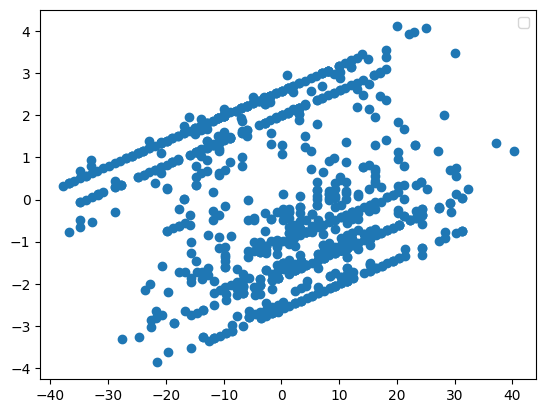

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA()
Xt = pca.fit_transform(cleandf)
plot = plt.scatter(Xt[:,0], Xt[:,1])
plt.legend(handles=plot.legend_elements()[0], labels=list(cleandf['Age']))
plt.show()


In [37]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\aksel\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [38]:
%pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\aksel\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
